In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [3]:
PATH = 'C:\\Users\\josep\\OneDrive\\Desktop\\Capstone\\Jupyter\\Dataset\\'
Dataset = pd.read_csv(PATH + 'csv_preprocessed.csv')

In [4]:
Dataset['Attack Type'] = Dataset['Attack Type'].apply(lambda x: 0 if x == 0 else 1)

In [5]:
Dataset.head()

,Dur,sTos,dTos,sTtl,dTtl,sHops,dHops,TotPkts,SrcPkts,DstPkts,...,Cause_Status,State_ACC,State_CON,State_ECO,State_FIN,State_INT,State_REQ,State_RST,State_URP,Attack Type
0,-0.807085,-0.069046,-0.094739,-0.419379,-0.00732,1.050111,-0.973059,-0.167011,-0.146696,-0.115856,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,-0.807085,-0.069046,-0.094739,-0.419379,-0.00732,1.050111,-0.973059,-0.167011,-0.146696,-0.115856,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,2.147963,-0.069046,-0.094739,0.635573,-0.00732,2.452913,-0.973059,8.414004,10.443194,1.327973,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2.147973,-0.069046,-0.094739,0.635573,-0.00732,2.452913,-0.973059,7.205410,8.651059,1.568612,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2.148810,-0.069046,-0.094739,0.635573,-0.00732,2.452913,-0.973059,8.776582,10.877651,1.408186,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
data = Dataset[["SrcWin", "DstWin", "dHops", "dTtl", "TotBytes", "SrcBytes", "sMeanPktSz", "DstGap", "SrcGap", "dTos", "DstTCPBase", "SrcTCPBase", "TcpRtt", "Proto_udp", "DstBytes", "AckDat" , "dMeanPktSz", "Proto_tcp", "SynAck", "Load"]]
data.head()

,SrcWin,DstWin,dHops,dTtl,TotBytes,SrcBytes,sMeanPktSz,DstGap,SrcGap,dTos,DstTCPBase,SrcTCPBase,TcpRtt,Proto_udp,DstBytes,AckDat,dMeanPktSz,Proto_tcp,SynAck,Load
0,3.442533e-07,6.217791e-08,-0.973059,-0.00732,-0.117591,-0.099523,0.164660,-0.006334,-0.00383,-0.094739,-4.275809e-14,3.187841e-12,-0.267969,0.0,-0.066388,-0.388062,-0.287785,0.0,-0.044552,-0.008291
1,3.442533e-07,6.217791e-08,-0.973059,-0.00732,-0.117591,-0.099523,0.164660,-0.006334,-0.00383,-0.094739,-4.275809e-14,3.187841e-12,-0.267969,0.0,-0.066388,-0.388062,-0.287785,0.0,-0.044552,-0.008291
2,3.442533e-07,6.217791e-08,-0.973059,-0.00732,8.131316,9.877388,8.044846,-0.006334,-0.00383,-0.094739,-4.275809e-14,3.187841e-12,-0.267969,1.0,0.224388,-0.388062,0.972879,0.0,-0.044552,-0.007624
3,3.442533e-07,6.217791e-08,-0.973059,-0.00732,7.224216,8.734380,8.598644,-0.006334,-0.00383,-0.094739,-4.275809e-14,3.187841e-12,-0.267969,1.0,0.259298,-0.388062,0.922515,0.0,-0.044552,-0.007698
4,3.442533e-07,6.217791e-08,-0.973059,-0.00732,9.162383,11.165238,8.769752,-0.006334,-0.00383,-0.094739,-4.275809e-14,3.187841e-12,-0.267969,1.0,0.201274,-0.388062,0.811590,0.0,-0.044552,-0.007541


In [7]:
def concat_column(dataset, column_name):
  concat_column_data = pd.concat([dataset, Dataset[column_name]], axis = 1)
  return concat_column_data

data = concat_column(data, "Attack Type")

In [8]:
data

,SrcWin,DstWin,dHops,dTtl,TotBytes,SrcBytes,sMeanPktSz,DstGap,SrcGap,dTos,...,SrcTCPBase,TcpRtt,Proto_udp,DstBytes,AckDat,dMeanPktSz,Proto_tcp,SynAck,Load,Attack Type
0,3.442533e-07,6.217791e-08,-0.973059,-0.007320,-0.117591,-0.099523,0.164660,-0.006334,-0.00383,-0.094739,...,3.187841e-12,-0.267969,0.0,-0.066388,-0.388062,-0.287785,0.0,-0.044552,-0.008291,0
1,3.442533e-07,6.217791e-08,-0.973059,-0.007320,-0.117591,-0.099523,0.164660,-0.006334,-0.00383,-0.094739,...,3.187841e-12,-0.267969,0.0,-0.066388,-0.388062,-0.287785,0.0,-0.044552,-0.008291,0
2,3.442533e-07,6.217791e-08,-0.973059,-0.007320,8.131316,9.877388,8.044846,-0.006334,-0.00383,-0.094739,...,3.187841e-12,-0.267969,1.0,0.224388,-0.388062,0.972879,0.0,-0.044552,-0.007624,0
3,3.442533e-07,6.217791e-08,-0.973059,-0.007320,7.224216,8.734380,8.598644,-0.006334,-0.00383,-0.094739,...,3.187841e-12,-0.267969,1.0,0.259298,-0.388062,0.922515,0.0,-0.044552,-0.007698,0
4,3.442533e-07,6.217791e-08,-0.973059,-0.007320,9.162383,11.165238,8.769752,-0.006334,-0.00383,-0.094739,...,3.187841e-12,-0.267969,1.0,0.201274,-0.388062,0.811590,0.0,-0.044552,-0.007541,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215670,2.707156e-05,4.905790e-06,-0.527905,14.282121,-0.114212,-0.099359,0.192118,-0.006334,-0.00383,18.475366,...,3.410344e-10,-0.267969,0.0,-0.060550,-0.388062,0.167821,0.0,-0.044552,-0.008291,0
1215671,2.559012e-05,4.637776e-06,1.697862,13.908052,-0.019596,-0.091676,0.155508,-0.006334,-0.00383,3.898832,...,3.245727e-10,-0.267969,0.0,0.098391,-0.388062,3.998627,0.0,-0.044552,-0.008174,0
1215672,-4.107094e-01,-9.461347e-01,5.259089,3.733371,-0.112489,-0.096989,0.041101,-0.006334,-0.00383,-0.094739,...,3.270300e-01,-0.267969,0.0,-0.060907,-0.388062,0.139927,1.0,-0.044552,-0.008280,0
1215673,2.559012e-05,4.637776e-06,1.697862,13.908052,-0.101093,-0.091022,0.192118,-0.006334,-0.00383,3.898832,...,3.245727e-10,-0.267969,0.0,-0.049112,-0.388062,0.161622,0.0,-0.044552,-0.008286,0


In [9]:
# Segregate features and labels into separate variables
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'Attack Type'], data['Attack Type'],
                                                    stratify=data['Attack Type'],
                                                    test_size=0.15)

X_train = pd.DataFrame(X_train, columns=data.columns.to_list()[:-1])
X_test = pd.DataFrame(X_test, columns=data.columns.to_list()[:-1])
y_train = pd.DataFrame(y_train, columns=['Attack Type'])
y_test = pd.DataFrame(y_test, columns=['Attack Type'])

print("Training dataset size:", X_train.shape)
print("Testing dataset size:", X_test.shape)
print("Training target size:", y_train.shape)
print("Testing target size:", y_test.shape)

Training dataset size: (1033323, 20)
Testing dataset size: (182352, 20)
Training target size: (1033323, 1)
Testing target size: (182352, 1)


In [10]:
# def get_pca_df(dataset, no_of_components):
#   from sklearn.decomposition import PCA
#   pca = PCA(n_components=no_of_components)
#   Principal_components=pca.fit_transform(dataset)
#   column_names = ["PC "+str(i) for i in range(1, no_of_components+1)]
#   pca_df = pd.DataFrame(data = Principal_components, columns = column_names)
#   return pca_df, pca


def pca_train_test(X_train, X_test, no_of_components):
  from sklearn.decomposition import PCA

  # Initialize PCA model
  pca = PCA(n_components=no_of_components)

  # Fit and transform the training data
  Principal_components_train = pca.fit_transform(X_train)
  column_names = ["PC " + str(i) for i in range(1, no_of_components + 1)]

  # Create a DataFrame for the training data
  train_data = pd.DataFrame(data=Principal_components_train, columns=column_names)

  # # Transform the test data using the same PCA model
  # Principal_components_test = pca.transform(X_test)

  # # Create a DataFrame for the test data
  # test_data = pd.DataFrame(data=Principal_components_test, columns=column_names)

  test_data = pca.transform(X_test)

  return train_data, test_data

In [11]:
X_train, X_test = pca_train_test(X_train, X_test, 15)

In [12]:
# Initialize and train the SVC model
svc_model = SVC(kernel='rbf', random_state=42)  # You can choose different kernels like 'rbf', 'poly', etc.
svc_model.fit(X_train, y_train)

C:\Users\josep\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=42)

In [13]:
# Predictions
y_pred_SVC = svc_model.predict(X_test)

C:\Users\josep\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [14]:
accuracy = accuracy_score(y_test, y_pred_SVC)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9999945161007283


In [15]:
# Compute and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_SVC)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[ 71629      0]
 [     1 110722]]


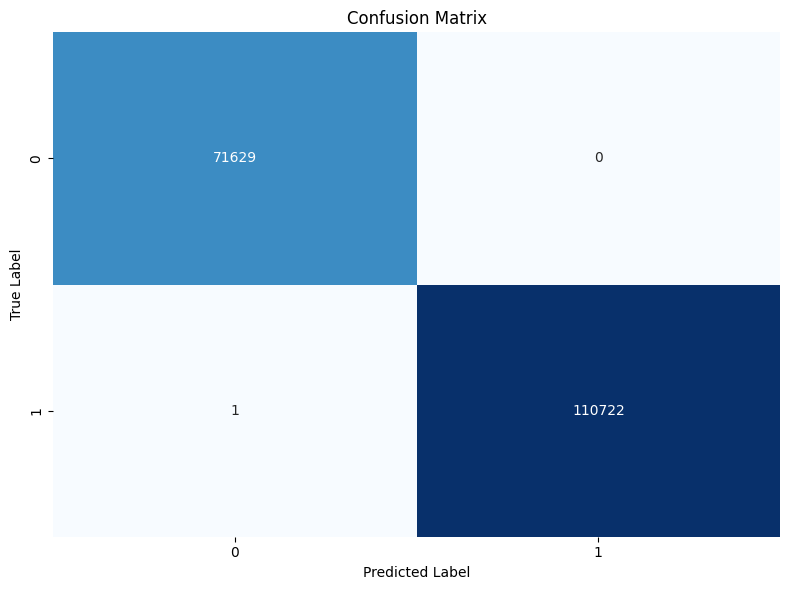

In [16]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Adjust layout to make room for the title
plt.tight_layout()

# Show plot
plt.show()

In [17]:
accuracy = accuracy_score(y_test, y_pred_SVC)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9999945161007283


In [18]:
precision = precision_score(y_test, y_pred_SVC, average='weighted') # Use 'binary' for binary classification
print(f'Precision: {precision}')

Precision: 0.999994516177287


In [19]:
recall = recall_score(y_test, y_pred_SVC, average='weighted') # Use 'binary' for binary classification
print(f'Recall: {recall}')

Recall: 0.9999945161007283


In [20]:
f1 = f1_score(y_test, y_pred_SVC, average='weighted') # Use 'binary' for binary classification
print(f'F1 Score: {f1}')

F1 Score: 0.9999945161074858


C:\Users\josep\AppData\Local\Temp\ipykernel_29068\709246085.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_values, y=metric_names, palette="viridis")


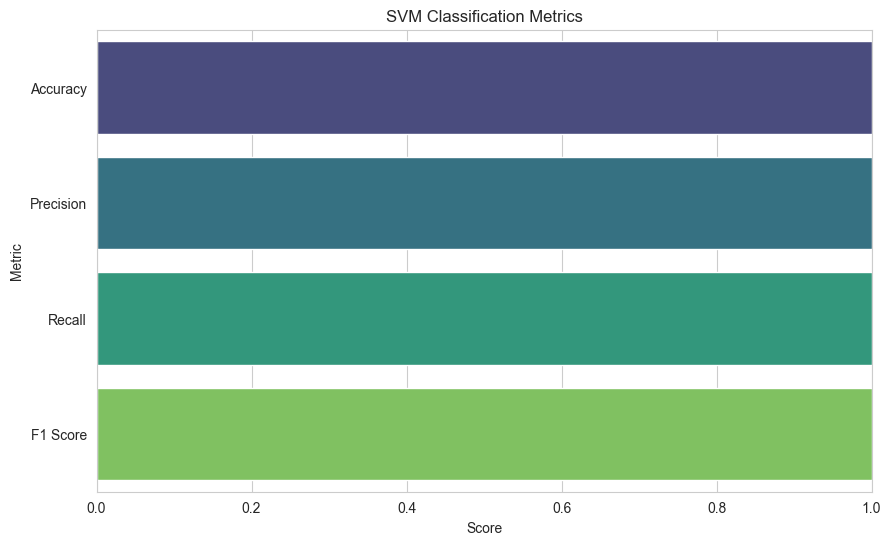

In [21]:
# Assuming metrics are stored in these variables
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    # 'ROC-AUC': roc_auc  # Uncomment if ROC-AUC is applicable and calculated
}

# Convert dictionary to lists for plotting
metric_names = list(metrics.keys())
metric_values = [metrics[metric] for metric in metric_names]

# Create bar plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=metric_values, y=metric_names, palette="viridis")

plt.xlabel('Score')
plt.ylabel('Metric')
plt.title('SVM Classification Metrics')
plt.xlim(0, 1)  # Assuming the scores are between 0 and 1
plt.show()